In [4]:
import new_adventure as na
import new_adventure.derivative_free_estimation as dfe
import numpy as np
import matplotlib.pyplot as plt
import time

from utils import convert_opt_path

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
exp_path = "/Users/daniellengyel/new_adventure/experiments/linear/"
# exp_path = "/rds/general/user/dl2119/home/new_adventure/experiments/linear/"

bfgs_folder = "BFGS_May30_13-02-34_Daniels-MacBook-Pro-4.local"
bfgs_id = "1622372554.19792"
bfgs_path = na.save_load.load_opt_path(exp_path + bfgs_folder, bfgs_id)

newton_folder = "Newton_IPM_May30_13-04-00_Daniels-MacBook-Pro-4.local"
newton_id = "1622372640.546655"
newton_path = na.save_load.load_opt_path(exp_path + newton_folder, newton_id)

shift_folder = "Newton_shift_est_IPM_May30_12-55-46_Daniels-MacBook-Pro-4.local"
shift_id = "1622372146.1822772"
shift_path = na.save_load.load_opt_path(exp_path + shift_folder, shift_id)

# bfgs_shift_folder = "BFGS_Apr19_14-55-42_Daniels-MacBook-Pro-4.local"
# bfgs_shift_id = "1618840542.725157"
# bfgs_shift_path = na.save_load.load_opt_path(exp_path + bfgs_shift_folder, bfgs_shift_id)

In [7]:


bfgs_vals = convert_opt_path(bfgs_path)
newton_vals = convert_opt_path(newton_path)
shift_vals = convert_opt_path(shift_path)
# bfgs_shift_vals = convert_opt_path(bfgs_shift_path)


# bfgs_vals = np.array([[[np.sum(p[i][0]), p[i][1]] for i in range(len(p))] for p in bfgs_path ]).reshape(-1, 2)
# newton_vals = np.array([[[np.sum(p[i][0]), p[i][1]] for i in range(len(p))] for p in newton_path ]).reshape(-1, 2)
# shift_vals = np.array([[[np.sum(p[i][0]), p[i][1]] for i in range(len(p))] for p in shift_path ]).reshape(-1, 2)

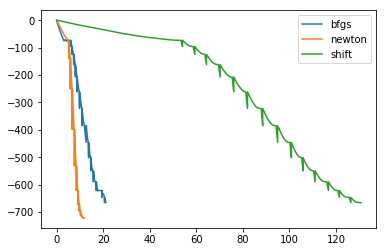

In [8]:
plt.plot(bfgs_vals[:, 1], bfgs_vals[:, 0], label="bfgs")
plt.plot(newton_vals[:, 1], newton_vals[:, 0], label="newton")
plt.plot(shift_vals[:, 1], shift_vals[:, 0], label="shift")
# plt.plot(bfgs_shift_vals[:, 1], bfgs_shift_vals[:, 0], label="bfgs_shift")

plt.legend()
# plt.ylim(-6000, -5500)
plt.show()

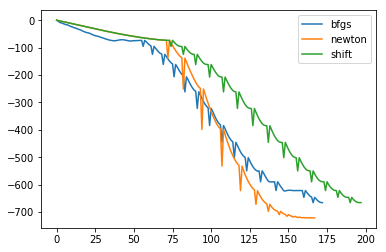

In [10]:
plt.plot(bfgs_vals[:, 0], label="bfgs")
plt.plot(newton_vals[:, 0], label="newton")
plt.plot(shift_vals[:, 0], label="shift")
# plt.plot(bfgs_shift_vals[:, 0], label="bfgs_shift")

plt.legend()
plt.show()

In [37]:
def path_distance(path1, path2):
    res = []
    if len(path1) < len(path2):
        shorter = path1
        longer = path2
    else:
        shorter = path2
        longer = path1
        
    longer_j = 0
    for i in range(len(shorter)):
        longer_j = i
#         print(longer_j)
        while ((longer_j + 1) < len(longer)) and (np.linalg.norm(shorter[i] - longer[longer_j]) > np.linalg.norm(shorter[i] - longer[longer_j+1])):
            longer_j += 1
        res.append(np.linalg.norm(shorter[i] - longer[longer_j]))
        if longer_j == len(longer) - 2:
            break
        
        
    for i in range(min(len(path1), len(path2))):
        res.append(np.linalg.norm(path1[i] - path2[i]))
    return res

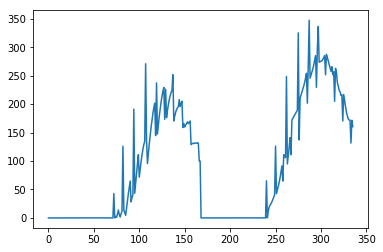

In [40]:
plt.plot(path_distance(shift_vals[:, 0], newton_vals[:, 0]))

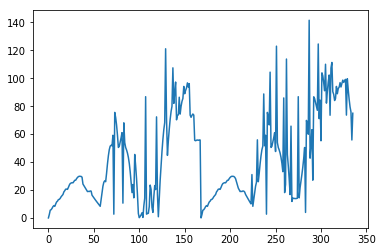

In [42]:
plt.plot(path_distance(bfgs_vals[:, 0], newton_vals[:, 0]))

In [50]:
t = 9
a = newton_path[t][-1][0]
b = shift_path[t][-1][0]
np.linalg.norm(a - b)

15.612983415095709

In [49]:
np.random.seed(11)
dim = 750
num_barriers = dim * 4
dirs = np.random.normal(size=(num_barriers, dim)) # sample gaussian and normalize 
ws = dirs/np.linalg.norm(dirs, axis=1).reshape(-1, 1)
bs = np.ones(num_barriers)


barrier = na.Barriers.LogPolytopeBarrier(ws, bs)

F = na.Functions.Linear(np.ones(dim))

F = barrier # na.Functions.LinearCombination(F, barrier, [1, 1])

In [59]:
est_hess = dfe.new_beta_second_shift_estimator(F, a[0], 200, 6000, control_variate=True)
true_hess = F.f2(np.array([a]))

est_inv_hess = np.linalg.inv(est_hess)
true_inv_hess = np.linalg.inv(true_hess)

In [60]:
np.linalg.norm(est_hess - true_hess)/np.linalg.norm(true_hess)

0.014561069440143938

In [61]:
np.linalg.norm(est_inv_hess - true_inv_hess)/np.linalg.norm(true_inv_hess)

0.022395838150512274

In [57]:
np.linalg.eig(est_hess)

(array([1.37779526e+06+0.00000000e+00j, 1.15699545e+06+0.00000000e+00j,
        1.13021908e+06+0.00000000e+00j, 1.08813940e+06+0.00000000e+00j,
        1.05299160e+06+0.00000000e+00j, 1.02341428e+06+0.00000000e+00j,
        9.56883869e+05+0.00000000e+00j, 9.22238315e+05+0.00000000e+00j,
        8.87429843e+05+0.00000000e+00j, 8.66451221e+05+0.00000000e+00j,
        8.59240646e+05+0.00000000e+00j, 8.13822527e+05+0.00000000e+00j,
        7.93338246e+05+0.00000000e+00j, 7.70450432e+05+0.00000000e+00j,
        7.45503800e+05+0.00000000e+00j, 7.30172336e+05+0.00000000e+00j,
        7.22344369e+05+0.00000000e+00j, 6.96913155e+05+0.00000000e+00j,
        6.62811449e+05+0.00000000e+00j, 6.43677807e+05+0.00000000e+00j,
        6.30260813e+05+0.00000000e+00j, 6.23836667e+05+0.00000000e+00j,
        6.02887811e+05+0.00000000e+00j, 5.83760618e+05+0.00000000e+00j,
        5.84602654e+05+0.00000000e+00j, 5.72471012e+05+0.00000000e+00j,
        5.56884371e+05+0.00000000e+00j, 5.46376257e+05+0.0000000

In [58]:
np.linalg.eig(true_hess)

(array([[1.37688583e+06, 1.15611822e+06, 1.12884420e+06, 1.08815277e+06,
         1.05169694e+06, 1.02336700e+06, 9.56644313e+05, 9.22497244e+05,
         8.86240662e+05, 8.65011764e+05, 8.58839682e+05, 8.13112376e+05,
         7.92791967e+05, 7.70075363e+05, 7.44813198e+05, 7.30523560e+05,
         7.21806092e+05, 6.96262820e+05, 6.62566178e+05, 6.43832427e+05,
         6.30582276e+05, 6.24215566e+05, 6.02829902e+05, 5.83323732e+05,
         5.85019621e+05, 5.72596967e+05, 5.56094821e+05, 5.45985410e+05,
         5.39139332e+05, 5.26506182e+05, 5.15453605e+05, 5.05327127e+05,
         4.99433612e+05, 4.94342231e+05, 4.84812936e+05, 4.81329434e+05,
         4.75289203e+05, 4.61880777e+05, 4.49777382e+05, 4.56254377e+05,
         4.43475122e+05, 4.34317243e+05, 4.30532189e+05, 4.23150754e+05,
         4.16416066e+05, 4.09159436e+05, 3.98760182e+05, 3.94624316e+05,
         3.86393466e+05, 3.84007271e+05, 3.79386938e+05, 3.68628901e+05,
         3.71982587e+05, 3.60641307e+05, 3.54095698